In [2]:
import pandas as pd
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder

In [8]:
# Query for games where the Celtics were playing
gamefinder = leaguegamefinder.LeagueGameFinder()
# The first DataFrame of those returned is what we want.
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22024,1610612764,WAS,Washington Wizards,0022400573,2025-01-16,WAS vs. PHX,L,239,123,...,0.667,12,33,45,28,13,4,13,22,-7.0
1,22024,1610612756,PHX,Phoenix Suns,0022400573,2025-01-16,PHX @ WAS,W,240,130,...,0.839,10,37,47,33,10,4,16,23,7.0
2,22024,1612709914,STO,Stockton Kings,2022400125,2025-01-16,STO @ SLC,None,122,62,...,0.800,5,19,24,19,4,5,4,5,4.4
3,22024,1612709924,SDC,San Diego Clippers,2022400121,2025-01-16,SDC @ CCG,L,239,109,...,0.733,19,23,42,17,14,6,10,21,-3.6
4,22024,1612709928,CCG,Capital City Go-Go,2022400121,2025-01-16,CCG vs. SDC,W,240,110,...,0.867,10,33,43,24,5,8,24,21,0.8


In [9]:
games.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [10]:
league_mean = games[
    [
        "MIN",
        "PTS",
        "FGM",
        "FGA",
        "FG_PCT",
        "FG3M",
        "FG3A",
        "FG3_PCT",
        "FTM",
        "FTA",
        "FT_PCT",
        "OREB",
        "DREB",
        "REB",
        "AST",
        "STL",
        "BLK",
        "TOV",
        "PF",
    ]
].mean()
print(league_mean)

MIN        191.892267
PTS         87.312400
FGM         32.398567
FGA         67.871467
FG_PCT       0.523832
FG3M         9.922067
FG3A        26.982467
FG3_PCT      0.397571
FTM         11.283767
FTA         14.619467
FT_PCT       0.774072
OREB         8.202133
DREB        24.938333
REB         33.140467
AST         19.846333
STL          6.327967
BLK          3.773967
TOV         10.917667
PF          15.284733
dtype: float64


In [11]:
games['GAME_DATE'] = pd.to_datetime(games['GAME_DATE'])

In [12]:
games['SEASON_ID']

0        22024
1        22024
2        22024
3        22024
4        22024
         ...  
29995    22019
29996    22019
29997    22019
29998    22019
29999    22019
Name: SEASON_ID, Length: 30000, dtype: object

In [18]:
full_seasons_12_24 = games[
    games["SEASON_ID"].isin(
        [
            "22024",
            "22023",
            "22022",
            "22021",
            "22020",
            "22019",
            "22018",
            "22017",
            "22016",
            "22015",
            "22014",
            "22013",
            "22012",
        ]
    )
]
full_seasons_12_24 

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22024,1610612764,WAS,Washington Wizards,0022400573,2025-01-16,WAS vs. PHX,L,239,123,...,0.667,12,33,45,28,13,4,13,22,-7.0
1,22024,1610612756,PHX,Phoenix Suns,0022400573,2025-01-16,PHX @ WAS,W,240,130,...,0.839,10,37,47,33,10,4,16,23,7.0
2,22024,1612709914,STO,Stockton Kings,2022400125,2025-01-16,STO @ SLC,None,122,62,...,0.800,5,19,24,19,4,5,4,5,4.4
3,22024,1612709924,SDC,San Diego Clippers,2022400121,2025-01-16,SDC @ CCG,L,239,109,...,0.733,19,23,42,17,14,6,10,21,-3.6
4,22024,1612709928,CCG,Capital City Go-Go,2022400121,2025-01-16,CCG vs. SDC,W,240,110,...,0.867,10,33,43,24,5,8,24,21,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,22019,1610612754,IND,Indiana Pacers,0021900828,2020-02-21,IND @ NYK,W,240,106,...,0.788,12,38,50,20,7,5,11,22,8.0
29996,22019,1612709910,FWN,Fort Wayne Mad Ants,2021900473,2020-02-21,FWN @ WES,W,240,112,...,0.667,16,43,59,27,4,5,13,29,6.0
29997,22019,1612709893,CTN,Canton Charge,2021900469,2020-02-21,CTN @ DEL,W,240,131,...,0.938,11,40,51,29,4,7,15,17,16.0
29998,22019,1610612761,TOR,Toronto Raptors,0021900829,2020-02-21,TOR vs. PHX,W,241,118,...,0.909,7,41,48,24,7,13,22,20,17.0


In [19]:
# First, drop the specified columns from celtics_games_12_24
seasons_12_24 = full_seasons_12_24.drop(
    columns=["TEAM_ID", "TEAM_ABBREVIATION", "TEAM_NAME", "GAME_ID","GAME_DATE", "MATCHUP", "WL"]
)


In [20]:
# Then, group by 'SEASON_ID' and calculate the mean for the remaining columns
seasons_12_24 = seasons_12_24.groupby("SEASON_ID").mean()
# Reset the index and rename it to 'Season'
seasons_12_24 = seasons_12_24.reset_index().rename(columns={"SEASON_ID": "Season"})
seasons_12_24

,Season,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,241.146119,114.299848,41.633181,89.073059,0.468805,12.727549,35.511416,0.358224,16.298326,...,0.762020,10.389650,34.152207,44.541857,25.056317,8.021309,4.547945,14.404871,21.281583,-0.029833
1,22020,237.462138,108.969191,40.066444,86.542687,0.463459,12.098738,33.437268,0.360491,16.086488,...,0.777678,9.832962,33.680401,43.513363,24.214551,7.694878,4.714180,13.563474,19.207498,-0.004380
2,22021,229.422008,102.271713,37.888865,80.771604,0.477274,11.606213,31.994968,0.367946,13.533363,...,0.760426,9.829797,30.312623,40.142420,23.207832,7.475170,4.511267,12.648873,18.396193,-0.080026
3,22022,235.434707,109.982373,40.277309,85.544687,0.471014,11.705809,32.841857,0.354781,16.050894,...,0.772248,10.437686,32.047418,42.485104,24.409136,7.593595,4.607249,13.896971,19.730139,-0.003078
4,22023,234.767002,109.278496,40.157328,86.024665,0.466760,12.058190,33.617577,0.356994,15.181753,...,0.772851,10.575192,32.146791,42.721983,25.306753,7.754310,5.172893,13.573755,18.959770,0.001197
5,22024,227.620206,102.934518,37.544902,82.365762,0.455566,11.742283,33.335360,0.349211,15.330215,...,0.770265,10.386810,30.890552,41.277362,23.991581,8.239008,4.927035,14.017774,18.598690,-0.007951


In [23]:

# seasons_12_24.iloc[0,0] = 2012
# seasons_12_24.iloc[1,0] = 2013
# seasons_12_24.iloc[2,0] = 2014
# seasons_12_24.iloc[3,0] = 2015
# seasons_12_24.iloc[4,0] = 2016
# seasons_12_24.iloc[5,0] = 2017
# seasons_12_24.iloc[6,0] = 2018
seasons_12_24.iloc[0,0] = 2019
seasons_12_24.iloc[1,0] = 2020
seasons_12_24.iloc[2,0] = 2021
seasons_12_24.iloc[3,0] = 2022
seasons_12_24.iloc[4,0] = 2023
seasons_12_24.iloc[5,0] = 2024

seasons_12_24

,Season,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,2019,241.146119,114.299848,41.633181,89.073059,0.468805,12.727549,35.511416,0.358224,16.298326,...,0.762020,10.389650,34.152207,44.541857,25.056317,8.021309,4.547945,14.404871,21.281583,-0.029833
1,2020,237.462138,108.969191,40.066444,86.542687,0.463459,12.098738,33.437268,0.360491,16.086488,...,0.777678,9.832962,33.680401,43.513363,24.214551,7.694878,4.714180,13.563474,19.207498,-0.004380
2,2021,229.422008,102.271713,37.888865,80.771604,0.477274,11.606213,31.994968,0.367946,13.533363,...,0.760426,9.829797,30.312623,40.142420,23.207832,7.475170,4.511267,12.648873,18.396193,-0.080026
3,2022,235.434707,109.982373,40.277309,85.544687,0.471014,11.705809,32.841857,0.354781,16.050894,...,0.772248,10.437686,32.047418,42.485104,24.409136,7.593595,4.607249,13.896971,19.730139,-0.003078
4,2023,234.767002,109.278496,40.157328,86.024665,0.466760,12.058190,33.617577,0.356994,15.181753,...,0.772851,10.575192,32.146791,42.721983,25.306753,7.754310,5.172893,13.573755,18.959770,0.001197
5,2024,227.620206,102.934518,37.544902,82.365762,0.455566,11.742283,33.335360,0.349211,15.330215,...,0.770265,10.386810,30.890552,41.277362,23.991581,8.239008,4.927035,14.017774,18.598690,-0.007951


# Visuals


In [24]:
import plotly.express as px

fig = px.line(seasons_12_24, x='Season', y='FG3A', markers= True)
fig.show()

In [165]:
celtics_games['Season'].dtype

dtype('O')

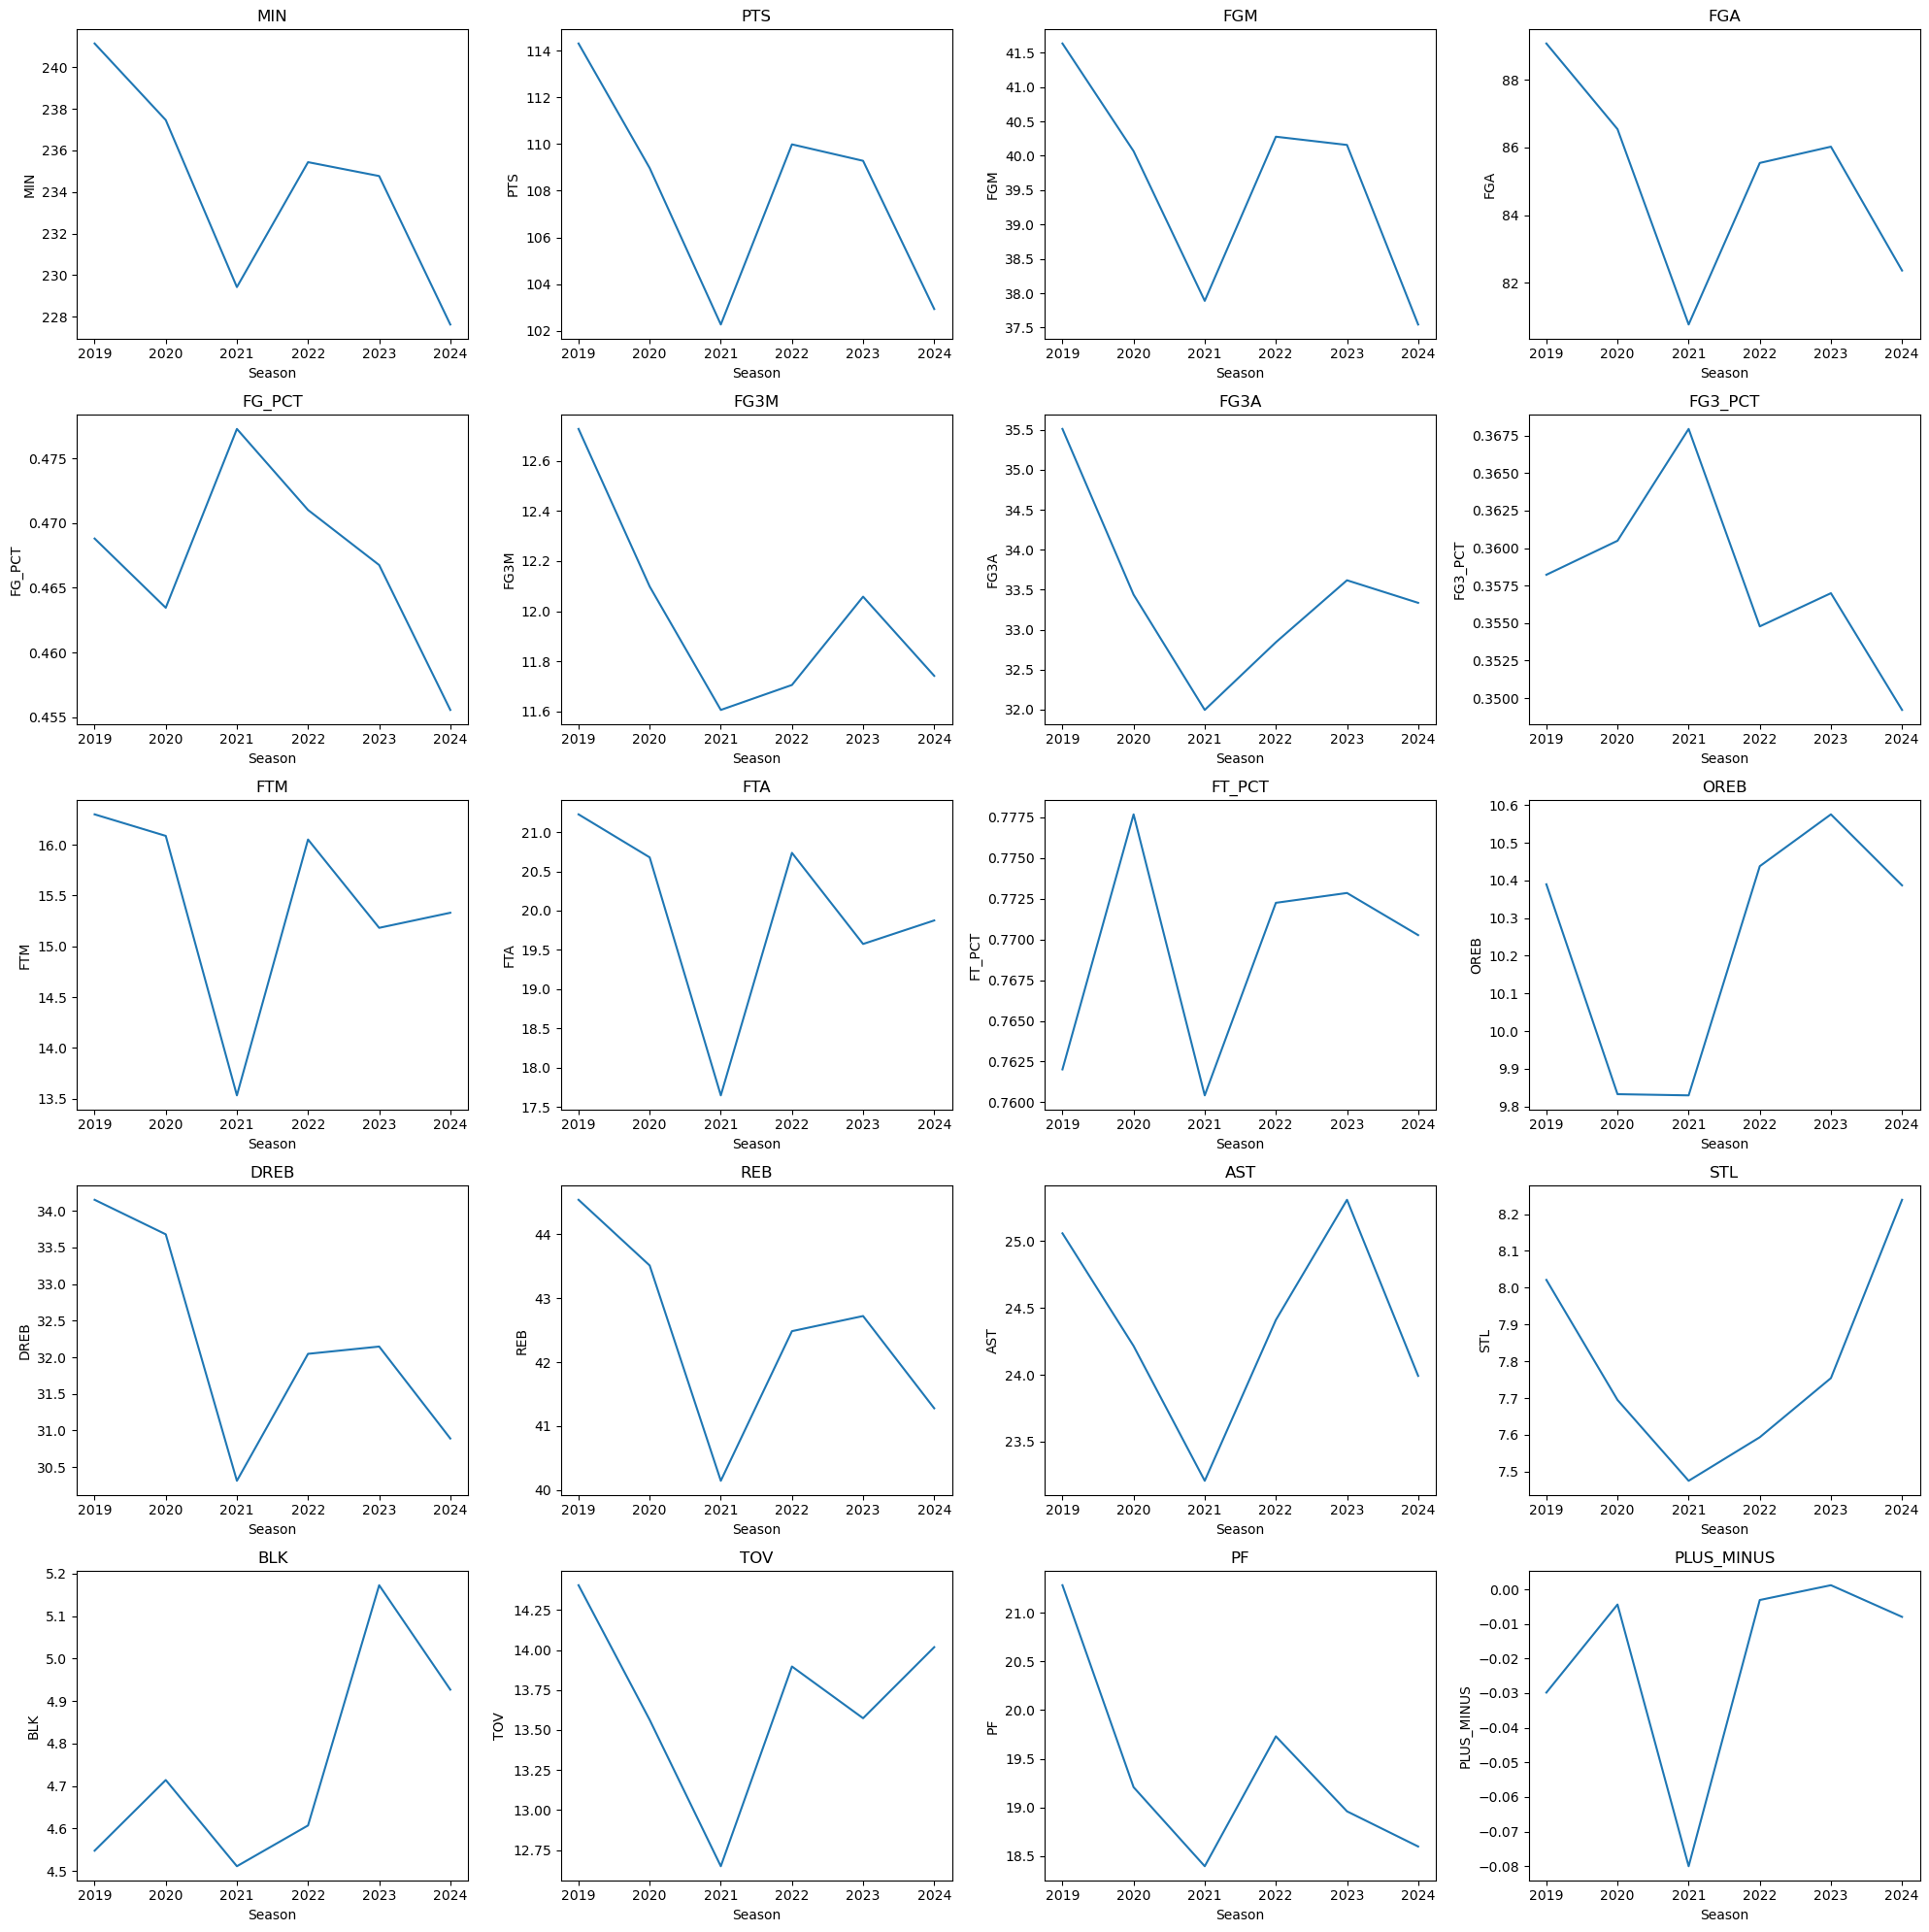

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
fig, axes = plt.subplots(5, 4, figsize=(20, 20))  # Adjust based on number of stats
axes = axes.ravel()

for i, col in enumerate(seasons_12_24.columns[1:]):  # Skip 'year' column
    sns.lineplot(data=seasons_12_24, x="Season", y=col, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

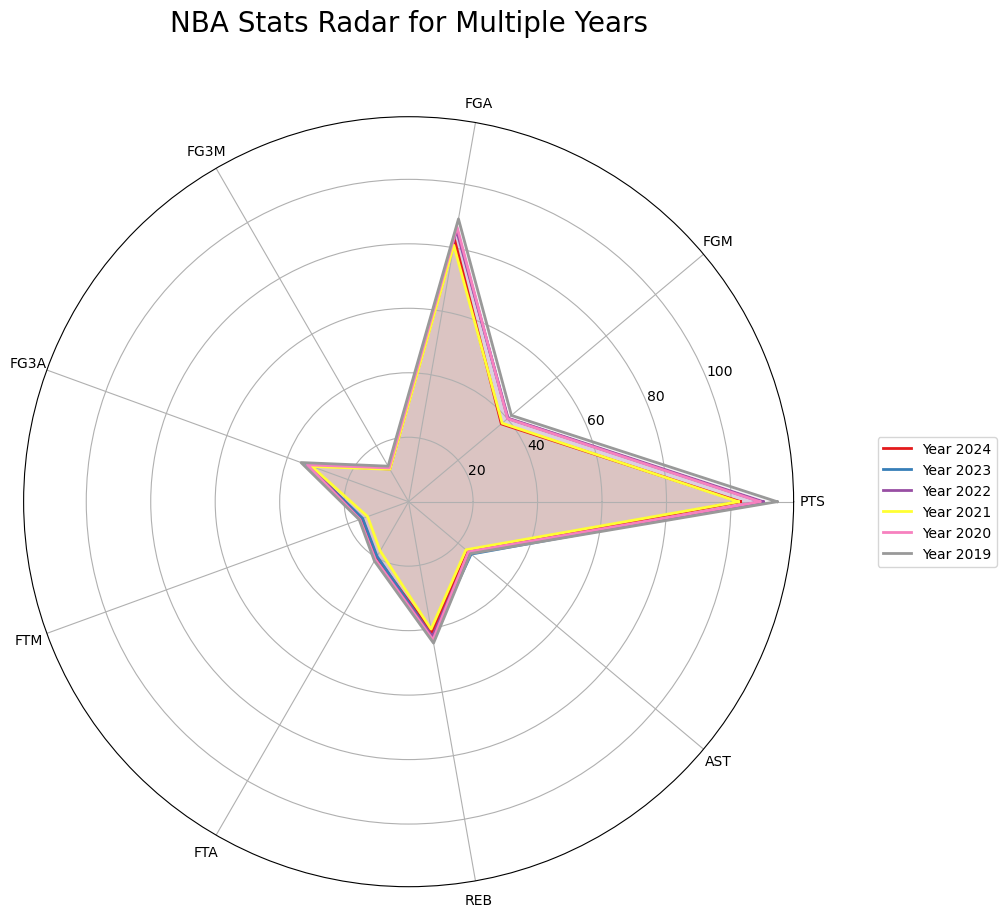

In [26]:
import matplotlib.pyplot as plt
from math import pi
import numpy as np


def create_multiyear_spider_plot(df, years, stats):
    categories = list(stats)
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    for year in years:
        # Filter data for the current year
        year_data = df[df["Season"] == year]
        if year_data.empty:
            print(f"No data for year {year}")
            continue

        values = year_data[stats].iloc[0].tolist()  # Assuming one row per year
        values += values[:1]

        # Use a different color for each year
        color = plt.cm.Set1(np.linspace(0, 1, len(years)))[years.index(year)]
        ax.plot(
            angles,
            values,
            linewidth=2,
            linestyle="solid",
            label=f"Year {year}",
            color=color,
        )
        ax.fill(angles, values, alpha=0.1, color=color)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Adjust the position of the legend
    ax.legend(loc="center left", bbox_to_anchor=(1.1, 0.5))
    plt.title("NBA Stats Radar for Multiple Years", size=20, y=1.1)
    plt.show()


# Example usage
stats_to_plot = [
    "PTS",
    "FGM",
    "FGA",
    "FG3M",
    "FG3A",
    "FTM",
    "FTA",
    "REB",
    "AST",
]

# Assuming you want to plot for years 2020, 2021, 2022
years_to_plot = [2024,2023,2022,2021,2020,2019]  # Adjust these years based on your data

create_multiyear_spider_plot(seasons_12_24, years_to_plot, stats_to_plot)

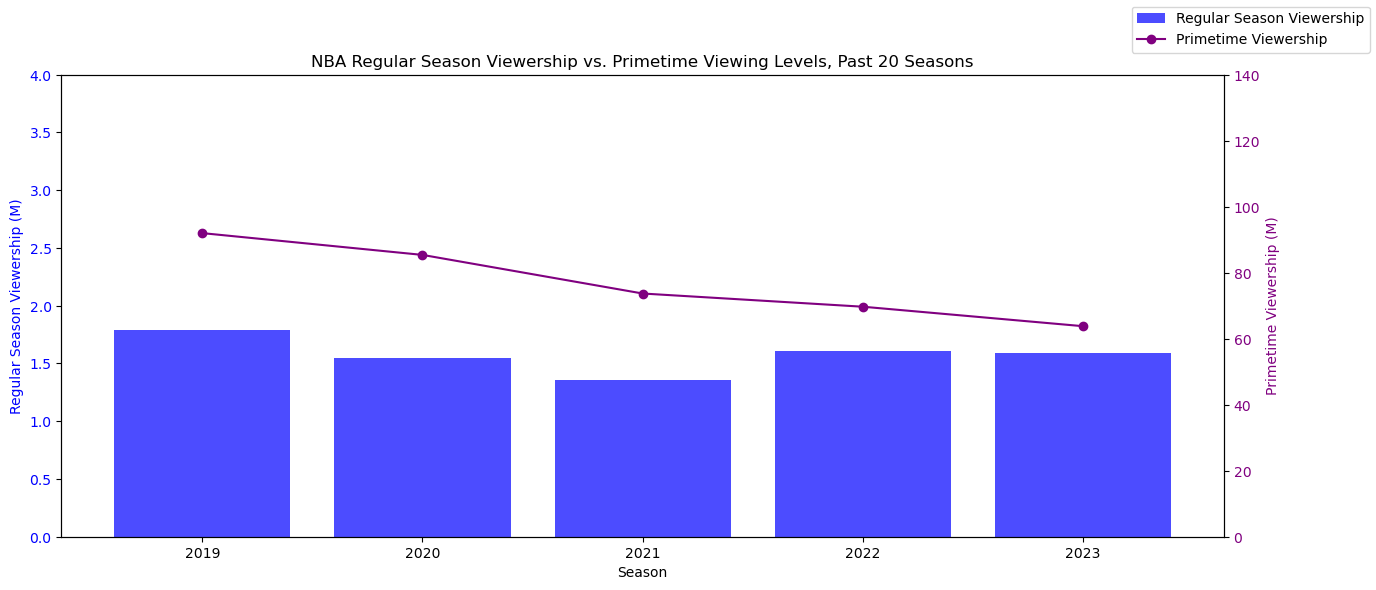

In [32]:
data = pd.read_csv("./nba_viewership.csv")

# Setup the figure and axes
fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 = ax1.twinx()

# Plotting
ax1.bar(
    data["Season"],
    data["Regular_Season_Viewership"],
    color="blue",
    alpha=0.7,
    label="Regular Season Viewership",
)
ax2.plot(
    data["Season"],
    data["Primetime_Viewership"],
    color="purple",
    marker="o",
    label="Primetime Viewership",
)

# Customizing
ax1.set_xlabel("Season")
ax1.set_ylabel("Regular Season Viewership (M)", color="blue")
ax2.set_ylabel("Primetime Viewership (M)", color="purple")
ax1.tick_params(axis="y", labelcolor="blue")
ax2.tick_params(axis="y", labelcolor="purple")
plt.title("NBA Regular Season Viewership vs. Primetime Viewing Levels, Past 20 Seasons")

# Adjusting scales
ax1.set_ylim(0, 4)
ax2.set_ylim(0, 140)

# Show legend
fig.legend(loc="upper right")

plt.show()

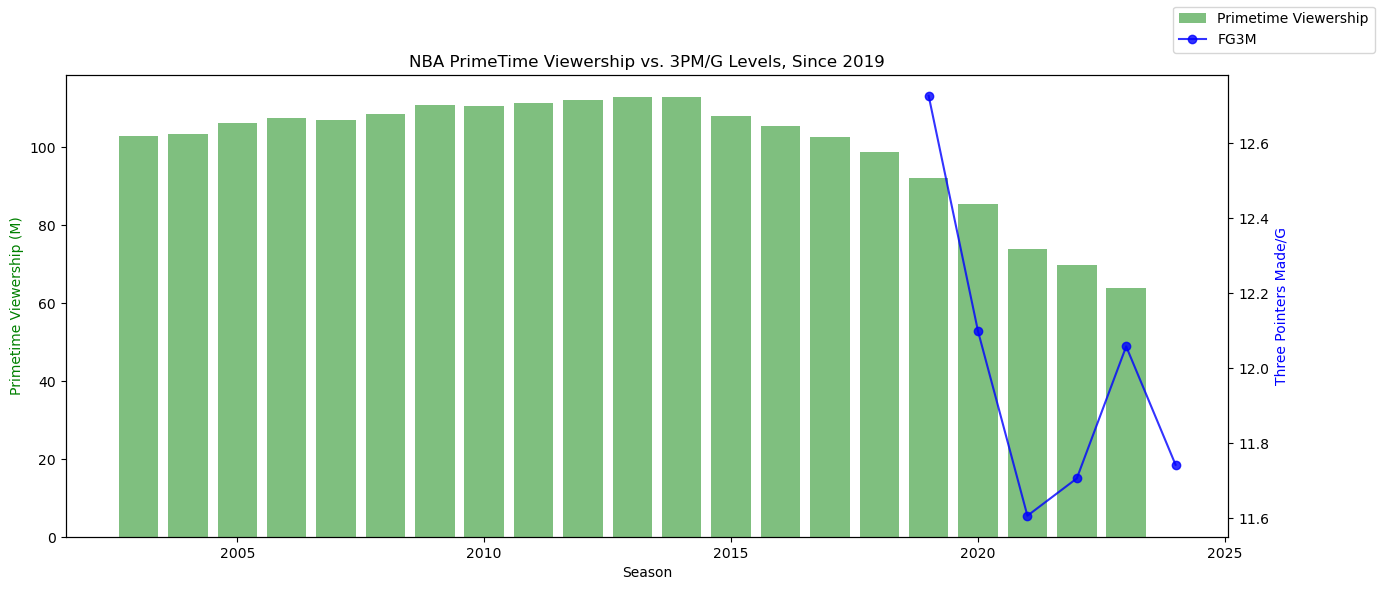

In [61]:
data = pd.read_csv("./nba_viewership_02_23.csv")

# Setup the figure and axes
fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 = ax1.twinx()

# Plotting
ax1.bar(
    data["Season"],
    data["Primetime_Viewership"],
    color="green",
    alpha=0.5,
    label="Primetime Viewership",
)
ax2.plot(
    seasons_12_24["Season"],
    seasons_12_24["FG3M"],
    color="blue",
    alpha=0.8,
    marker="o",
    label="FG3M",
)

# Customizing
ax1.set_xlabel("Season")
ax1.set_ylabel("Primetime Viewership (M)", color="green")
ax2.set_ylabel("Three Pointers Made/G", color="blue")
ax1.tick_params(axis="y", labelcolor="black")
ax2.tick_params(axis="y", labelcolor="black")
plt.title("NBA PrimeTime Viewership vs. 3PM/G Levels, Since 2019")

# Adjusting scales
# ax1.set_ylim(0, 150)
# ax2.set_ylim(0, 55)

# Show legend
fig.legend(loc="upper right")

plt.show()

In [55]:
nba_data = pd.merge(seasons_12_24,data, on ='Season')
nba_data = nba_data.drop('Descripton', axis=1)
nba_data

,Season,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,Regular_Season_Viewership,Primetime_Viewership
0,2019,241.146119,114.299848,41.633181,89.073059,0.468805,12.727549,35.511416,0.358224,16.298326,...,34.152207,44.541857,25.056317,8.021309,4.547945,14.404871,21.281583,-0.029833,1.79,92.0
1,2020,237.462138,108.969191,40.066444,86.542687,0.463459,12.098738,33.437268,0.360491,16.086488,...,33.680401,43.513363,24.214551,7.694878,4.714180,13.563474,19.207498,-0.004380,1.55,85.4
2,2021,229.422008,102.271713,37.888865,80.771604,0.477274,11.606213,31.994968,0.367946,13.533363,...,30.312623,40.142420,23.207832,7.475170,4.511267,12.648873,18.396193,-0.080026,1.36,73.7
3,2022,235.434707,109.982373,40.277309,85.544687,0.471014,11.705809,32.841857,0.354781,16.050894,...,32.047418,42.485104,24.409136,7.593595,4.607249,13.896971,19.730139,-0.003078,1.61,69.7
4,2023,234.767002,109.278496,40.157328,86.024665,0.466760,12.058190,33.617577,0.356994,15.181753,...,32.146791,42.721983,25.306753,7.754310,5.172893,13.573755,18.959770,0.001197,1.59,63.8


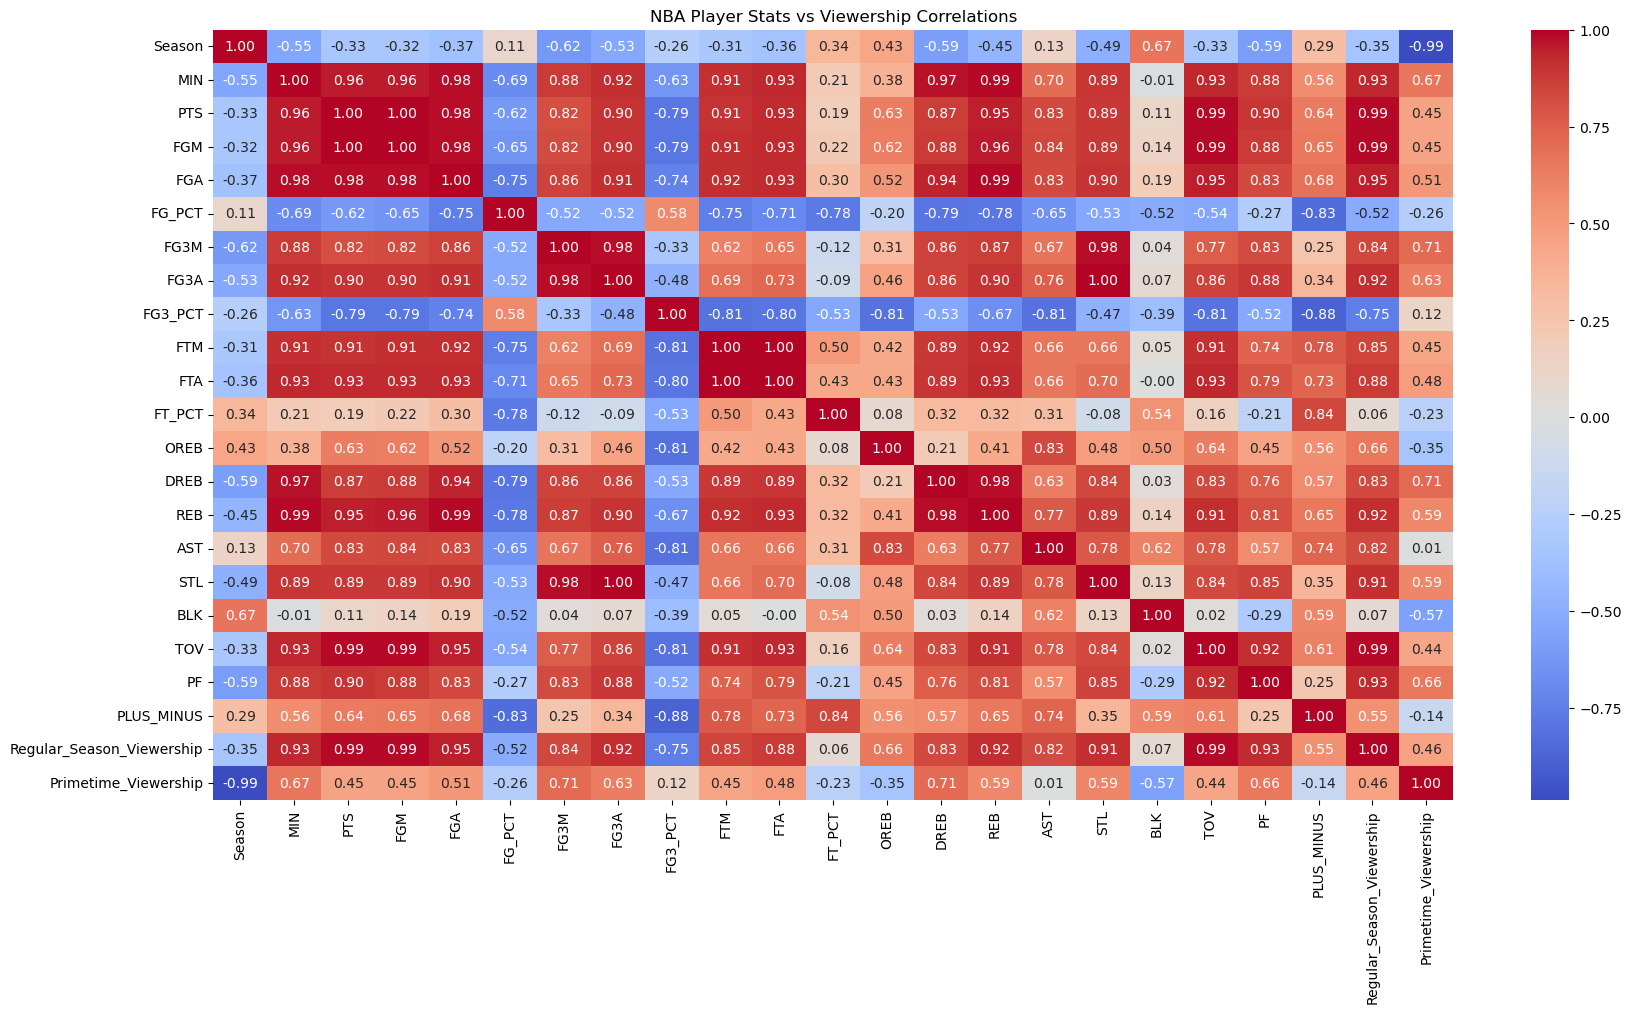

In [58]:
correlations = nba_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("NBA Player Stats vs Viewership Correlations")
plt.show()